# Count the number of objects in an Image
##### (taking a cell image to calculate the number of cells)

Cell 1: Area = 15604.0, Perimeter = 728.239682094289, Centroid = (77.7921686746988, 389.5024993591387)
Cell 2: Area = 15690.0, Perimeter = 685.6538956566621, Centroid = (116.23333333333333, 955.6004461440408)
Cell 3: Area = 44432.0, Perimeter = 1780.2854967367377, Centroid = (236.44236136118113, 466.00130536550233)
Cell 4: Area = 23421.0, Perimeter = 904.2468247692254, Centroid = (134.1926049272021, 1203.5212416207678)
Cell 5: Area = 21695.0, Perimeter = 948.0041840821061, Centroid = (206.54740723669047, 135.78114772989167)
Cell 6: Area = 3.0, Perimeter = 3.414213562373095, Centroid = (121.66666666666667, 532.6666666666666)
Cell 7: Area = 8.0, Perimeter = 8.242640687119284, Centroid = (130.875, 527.25)
Cell 8: Area = 12534.0, Perimeter = 609.5706345359769, Centroid = (251.76104994415192, 856.9194989628211)
Cell 9: Area = 2.0, Perimeter = 0.0, Centroid = (255.5, 490.0)
Cell 10: Area = 2.0, Perimeter = 0.0, Centroid = (264.5, 510.0)
Cell 11: Area = 490.0, Perimeter = 147.0538238691624, C

Text(0.5, 1.0, 'Detected Image')

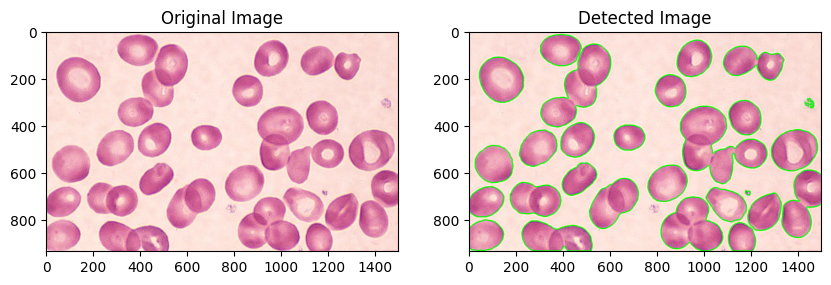

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import regionprops, label

fig=plt.figure(figsize=(10,10))
# Load the image
image_path = '/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc16.JPG'  # Replace with your image path
image = cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# Apply thresholding
_, thresholded = cv2.threshold(blurred, 185, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by size to ignore noise
min_cell_area = 150  # Adjust based on your image resolution
rbc_contours = [c for c in contours if cv2.contourArea(c) > min_cell_area]

labeled_image = label(thresholded)
properties = regionprops(labeled_image)

for i, prop in enumerate(properties):
  print(f"Cell {i + 1}: Area = {prop.area}, Perimeter = {prop.perimeter}, Centroid = {prop.centroid}")

# Draw contours on the original image
output_image = image.copy()
cv2.drawContours(output_image, rbc_contours, -1, (0, 255, 0), 4)

# Count the cells
num_cells = len(rbc_contours)
print(f"Number of RBCs detected: {num_cells}")

fig.add_subplot(121)
plt.imshow(image)
plt.title("Original Image")

fig.add_subplot(122)
plt.imshow(output_image)
plt.title("Detected Image")


Text(0.5, 1.0, 'Poisson Image')

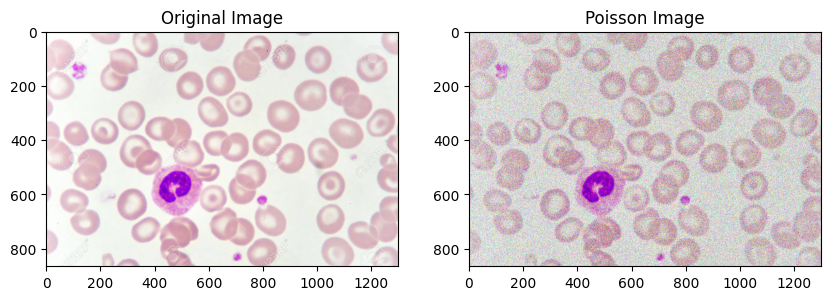

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(10,10))
# Load the image
image_path = '/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc2.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig.add_subplot(121)
plt.imshow(image)
plt.title("Original Image")

# Convert to float (important for accurate noise addition)
image = image.astype(np.float32)


noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
noise_intensity = 30

# Scale the image for Poisson noise
scaled_image = image / noise_intensity

# Add Poisson noise
noisy_image = np.random.poisson(scaled_image) * noise_intensity

# Clip values to valid range and convert back to original type
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)


fig.add_subplot(122)
plt.imshow(noisy_image,cmap='gray')
plt.title("Poisson Image")




Text(0.5, 1.0, 'Poisson Image')

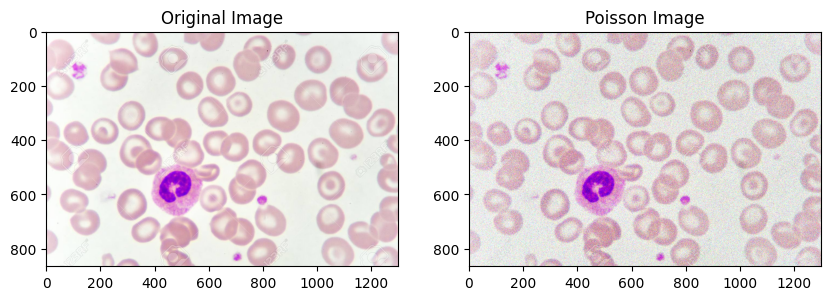

In [ ]:
import torch
import torchvision.transforms as T
from PIL import Image

# Load an image using PIL
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc2.jpg')
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(10,10))
fig.add_subplot(121)
plt.imshow(image)
plt.title("Original Image")

transform = T.ToTensor()  # Transform to [0, 1] tensor
image_tensor = transform(image)

# Define noise intensity (lower values = higher noise)
noise_intensity = 30  # Adjust to control noise intensity

# Scale the image for Poisson noise
scaled_image = image_tensor * noise_intensity

# Add Poisson noise
noisy_image = torch.poisson(scaled_image)

# Scale back to original range and clip
noisy_image = noisy_image / noise_intensity
noisy_image = torch.clamp(noisy_image, 0, 1)

# Convert back to PIL image for saving or displaying
to_pil = T.ToPILImage()
noisy_image_pil = to_pil(noisy_image)

fig.add_subplot(122)
plt.imshow(noisy_image_pil)
plt.title("Poisson Image")


Text(0.5, 1.0, 'Original Image')

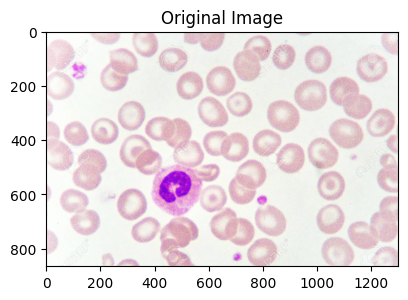

In [ ]:
images = Image.open('/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc2.jpg')
transform = T.ToTensor()  # Transform to [0, 1] tensor
image_tensor = transform(images)
noise_parameter=0.2
a = noise_parameter*torch.ones(image_tensor.shape)
p = torch.poisson(a)
p_norm = p/p.max()
image_tensor = (image_tensor + p_norm).clip(0,1)
from matplotlib import pyplot as plt
to_pil = T.ToPILImage()
noisy_image_pil = to_pil(image_tensor)
fig=plt.figure(figsize=(10,10))
fig.add_subplot(121)
plt.imshow(noisy_image_pil)
plt.title("Original Image")

Number of blood cells detected: 0


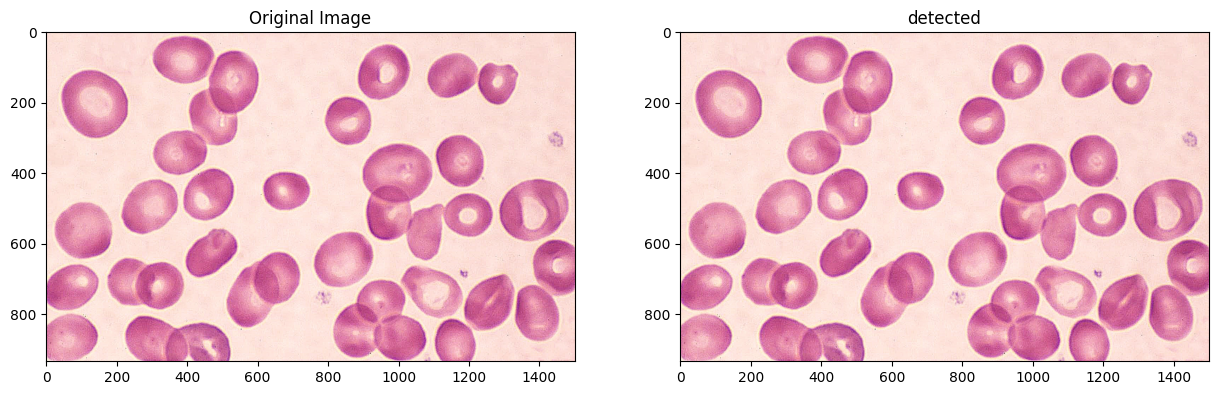

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import regionprops, label

fig=plt.figure(figsize=(15,10))


def count_blood_cells(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    if image is None:
        print("Error: Could not read image.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    kernel=np.array([[5,5,5],[5,5,5],[5,5,5]])
    sharpened = cv2.filter2D(gray, -1, kernel)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(sharpened, (5, 5), 0)

    # Apply adaptive thresholding
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size (to remove small artifacts)
    min_contour_area = 1
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Draw contours on the original image
    output = image.copy()
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)

    # Draw contours on the original image
    output = image.copy()
    cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 2)


    # Display results
    print(f"Number of blood cells detected: {len(filtered_contours)}")
    fig.add_subplot(121)
    plt.imshow(image)
    plt.title("Original Image")



    fig.add_subplot(122)
    plt.imshow(output)
    plt.title("detected")

# Example usage
image_path = "/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc16.JPG"
count_blood_cells(image_path)

Number of red blood cells detected: 2


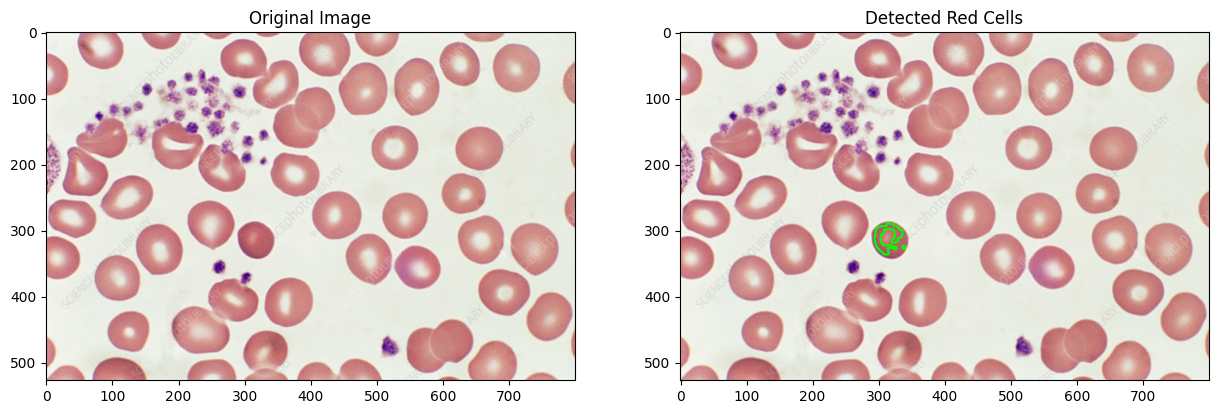

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

def count_red_blood_cells(image_path):
    # Read and convert image to RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if image is None:
        print("Error: Could not read image.")
        return

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define lower and upper range for red color in HSV
    lower_red1 = np.array([0, 120, 50])    # First red range
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 120, 50])  # Second red range
    upper_red2 = np.array([180, 255, 255])

    # Create masks for both red ranges and combine them
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = mask1 + mask2  # Final red mask

    # Apply morphological operations to clean noise
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours from the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    output = image.copy()
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

    # Display results
    print(f"Number of red blood cells detected: {len(contours)}")

    fig.add_subplot(121)
    plt.imshow(image)
    plt.title("Original Image")

    fig.add_subplot(122)
    plt.imshow(output)
    plt.title("Detected Red Cells")
    plt.show()

# Example usage
image_path = "/content/drive/MyDrive/Colab Notebooks/Standard Images/rbc112.jpeg"
count_red_blood_cells(image_path)
